#IDH

#### Fontes

Municípios: http://www.pnud.org.br/atlas/ranking/Ranking-IDHM-Municipios-2010.aspx

Estados: http://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_IDH


In [1]:
%matplotlib inline
import pandas as pd
import requests as req
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel

np.set_printoptions(precision=3)

### Carregando dados de IDH-M da Wikipedia

In [2]:
url = 'http://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_IDH'

In [3]:
html_text = req.get(url).text

In [4]:
table = pd.read_html(html_text, attrs={"class":"wikitable"})[0]

In [5]:
def idh_format(str):
    num = float(str)/1000.0
    return num

### Pré-Processando IDH-M Data

In [6]:
"""
  0,800 – 1 (Muito alto) - idh_level = 0
  0,700 - 0,799 (Alto)   - idh_level = 0
  0,600 - 0,699 (Médio)  - idh_level = 1
  0,500 - 0,599 (Baixo)  - idh_level = 2
  0 - 0,499 (Muito baixo)- idh_level = 3
"""
def idh_level(x):
    if x >= 0.7:
        return 0
    elif 0.6 <= x < 0.7:
        return 1
    elif 0.5 <= x < 0.6:
        return 2
    elif 0.4 <= x < 0.5:
        return 3
    else: raise Exception("Invalid!")
    
"""
  Abaixo da mediana de 2000 = level 0
  Igual ou acima da mediana de 2000 = level 1
"""
def idh_level2(x):
    if x >= table[4][2:].apply(idh_format).median():
        return 1
    else: return 0   


In [7]:
idhm_df = pd.DataFrame({u'Estado':table[2][2:].tolist(),u'2010':table[3][2:].apply(idh_format).tolist(),u'2000':table[4][2:].apply(idh_format).tolist()})
idhm_df["Ratio"] = idhm_df["2010"]/idhm_df["2000"]
idhm_df["idh_level_2000"] = idhm_df["2000"].apply(idh_level2)

In [8]:
idhm_df

,2000,2010,Estado,Ratio,idh_level_2000
0,0.725,0.824,Distrito Federal,1.136552,1
1,0.702,0.783,São Paulo,1.115385,1
2,0.674,0.774,Santa Catarina,1.148368,1
3,0.664,0.761,Rio de Janeiro,1.146084,1
4,0.650,0.749,Paraná,1.152308,1
5,0.664,0.746,Rio Grande do Sul,1.123494,1
6,0.640,0.740,Espírito Santo,1.156250,1
7,0.615,0.735,Goiás,1.195122,1
8,0.624,0.731,Minas Gerais,1.171474,1
9,0.613,0.729,Mato Grosso do Sul,1.189233,1


### Análise Descritiva

In [9]:
idhm_df.describe()

,2000,2010,Ratio,idh_level_2000
count,27.000000,27.000000,27.000000,27.000000
mean,0.576407,0.704519,1.230795,0.518519
std,0.072960,0.049284,0.072885,0.509175
min,0.471000,0.631000,1.115385,0.000000
25%,0.517500,0.664000,1.163862,0.000000
50%,0.552000,0.699000,1.237132,1.000000
75%,0.632000,0.737500,1.286989,1.000000
max,0.725000,0.824000,1.342437,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e108dd6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5df46329b0>]], dtype=object)

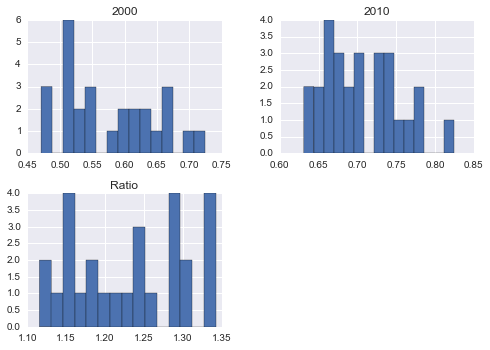

In [10]:
f = plt.figure(14)
idhm_df[["2000","2010","Ratio"]].hist(bins=15)

### Testando hipótese

#### A diferença média entre os IDHs de 2000 e 2010 é estatisticamente significativa?

In [11]:
ttest_rel(idhm_df['2000'], idhm_df['2010'])

(-24.939064182558965, 1.1042795294978112e-19)

In [12]:
import scipy  
import scikits.bootstrap as bootstrap
  
# compute 95% confidence intervals around the mean  
CIs00 = bootstrap.ci(data=idhm_df["2000"])  
CIs10 = bootstrap.ci(data=idhm_df["2010"])
CIsR  = bootstrap.ci(data=idhm_df["Ratio"])

print("IDHM 2000 mean 95% confidence interval. Low={0:.3f}\tHigh={1:.3f}".format(*tuple(CIs00)))
print("IDHM 2010 mean 95% confidence interval. Low={0:.3f}\tHigh={1:.3f}".format(*tuple(CIs10)))
print("IDHM ratio mean 95% confidence interval. Low={0:.3f}\tHigh={1:.3f}".format(*tuple(CIsR)))

IDHM 2000 mean 95% confidence interval. Low=0.550	High=0.604
IDHM 2010 mean 95% confidence interval. Low=0.687	High=0.724
IDHM ratio mean 95% confidence interval. Low=1.204	High=1.257


In [13]:
CIs00 = bootstrap.ci(data=idhm_df["2000"], statfunction=scipy.median)  
CIs10 = bootstrap.ci(data=idhm_df["2010"], statfunction=scipy.median)
CIsR  = bootstrap.ci(data=idhm_df["Ratio"], statfunction=scipy.median)

print("IDHM 2000 median 95% confidence interval. Low={0:.3f}\tHigh={1:.3f}".format(*tuple(CIs00)))
print("IDHM 2010 median 95% confidence interval. Low={0:.3f}\tHigh={1:.3f}".format(*tuple(CIs10)))
print("IDHM ratio median 95% confidence interval. Low={0:.3f}\tHigh={1:.3f}".format(*tuple(CIsR)))

IDHM 2000 median 95% confidence interval. Low=0.518	High=0.613
IDHM 2010 median 95% confidence interval. Low=0.665	High=0.729
IDHM ratio median 95% confidence interval. Low=1.171	High=1.282


A resposta de diversos testes, para um nível de 5% de significância, mostra que há fortes evidências que **sim**.

### Montando percentual de impacto da administração de cada partido em cada Estado da Federação.

In [14]:
state_parties = pd.DataFrame({"Estado":idhm_df.Estado,"PT":np.repeat(0.0,27),"PSDB":np.repeat(0.0,27),"Outros":np.repeat(0.0,27)})

In [15]:
st_pa = np.array([
        [u"Distrito Federal", 0.0, 0.0, 1.0],
        [u"São Paulo", 0.0, 0.925, 0.075],
        [u"Santa Catarina", 0.0, 0.0, 1.0],
        [u"Rio de Janeiro", 0.4, 0.0, 0.6],
        [u"Paraná", 0.0, 0.0, 1.0],
        [u"Rio Grande do Sul", 0.2, 0.4, 0.4],
        [u"Espírito Santo", 0.0, 0.2, 0.8],
        [u"Goiás", 0.0, 0.6, 0.4],
        [u"Minas Gerais", 0.0, 0.8, 0.2],
        [u"Mato Grosso do Sul", 0.0, 0.6, 0.4],
        [u"Mato Grosso", 0.0, 0.2, 0.8],
        [u"Amapá", 0.075, 0.0, 0.925],
        [u"Roraima", 0.275, 0.4, 0.325], # double check
        [u"Tocantins", 0.0, 0.2, 0.8], 
        [u"Rondônia", 0.0, 0.4, 0.6],
        [u"Rio Grande do Norte", 0.0, 0.0, 1.0],
        [u"Ceará", 0.6, 0.0, 0.4],
        [u"Amazonas", 0.0, 0.0, 1.0],
        [u"Pernambuco", 0.0, 0.0, 1.0],
        [u"Sergipe", 0.4, 0.2, 0.4],
        [u"Acre", 1.0, 0.0, 0.0],
        [u"Bahia", 0.4, 0.0, 0.6],
        [u"Paraíba", 0.0, 0.55, 0.45],
        [u"Piauí", 0.8, 0.0, 0.2],
        [u"Pará", 0.4, 0.6, 0.0],
        [u"Maranhão", 0.0, 0.0, 1.0],
        [u"Alagoas", 0.0, 0.0, 1.0],
       ])

In [16]:
np.float64(st_pa[:,1:]).sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [17]:
np.float64(st_pa[:,1:]).sum(axis=0)

array([  4.55 ,   6.075,  16.375])

In [18]:
state_parties_df = pd.DataFrame({"Estado":st_pa[:,0],"PSDB":np.float64(st_pa[:,2]),"PT":np.float64(st_pa[:,1]),"Outros":np.float64(st_pa[:,3])})

In [19]:
state_parties_df

,Estado,Outros,PSDB,PT
0,Distrito Federal,1.000,0.000,0.000
1,São Paulo,0.075,0.925,0.000
2,Santa Catarina,1.000,0.000,0.000
3,Rio de Janeiro,0.600,0.000,0.400
4,Paraná,1.000,0.000,0.000
5,Rio Grande do Sul,0.400,0.400,0.200
6,Espírito Santo,0.800,0.200,0.000
7,Goiás,0.400,0.600,0.000
8,Minas Gerais,0.200,0.800,0.000
9,Mato Grosso do Sul,0.400,0.600,0.000


In [20]:
df = idhm_df.merge(state_parties_df, on="Estado")
df

,2000,2010,Estado,Ratio,idh_level_2000,Outros,PSDB,PT
0,0.725,0.824,Distrito Federal,1.136552,1,1.000,0.000,0.000
1,0.702,0.783,São Paulo,1.115385,1,0.075,0.925,0.000
2,0.674,0.774,Santa Catarina,1.148368,1,1.000,0.000,0.000
3,0.664,0.761,Rio de Janeiro,1.146084,1,0.600,0.000,0.400
4,0.650,0.749,Paraná,1.152308,1,1.000,0.000,0.000
5,0.664,0.746,Rio Grande do Sul,1.123494,1,0.400,0.400,0.200
6,0.640,0.740,Espírito Santo,1.156250,1,0.800,0.200,0.000
7,0.615,0.735,Goiás,1.195122,1,0.400,0.600,0.000
8,0.624,0.731,Minas Gerais,1.171474,1,0.200,0.800,0.000
9,0.613,0.729,Mato Grosso do Sul,1.189233,1,0.400,0.600,0.000


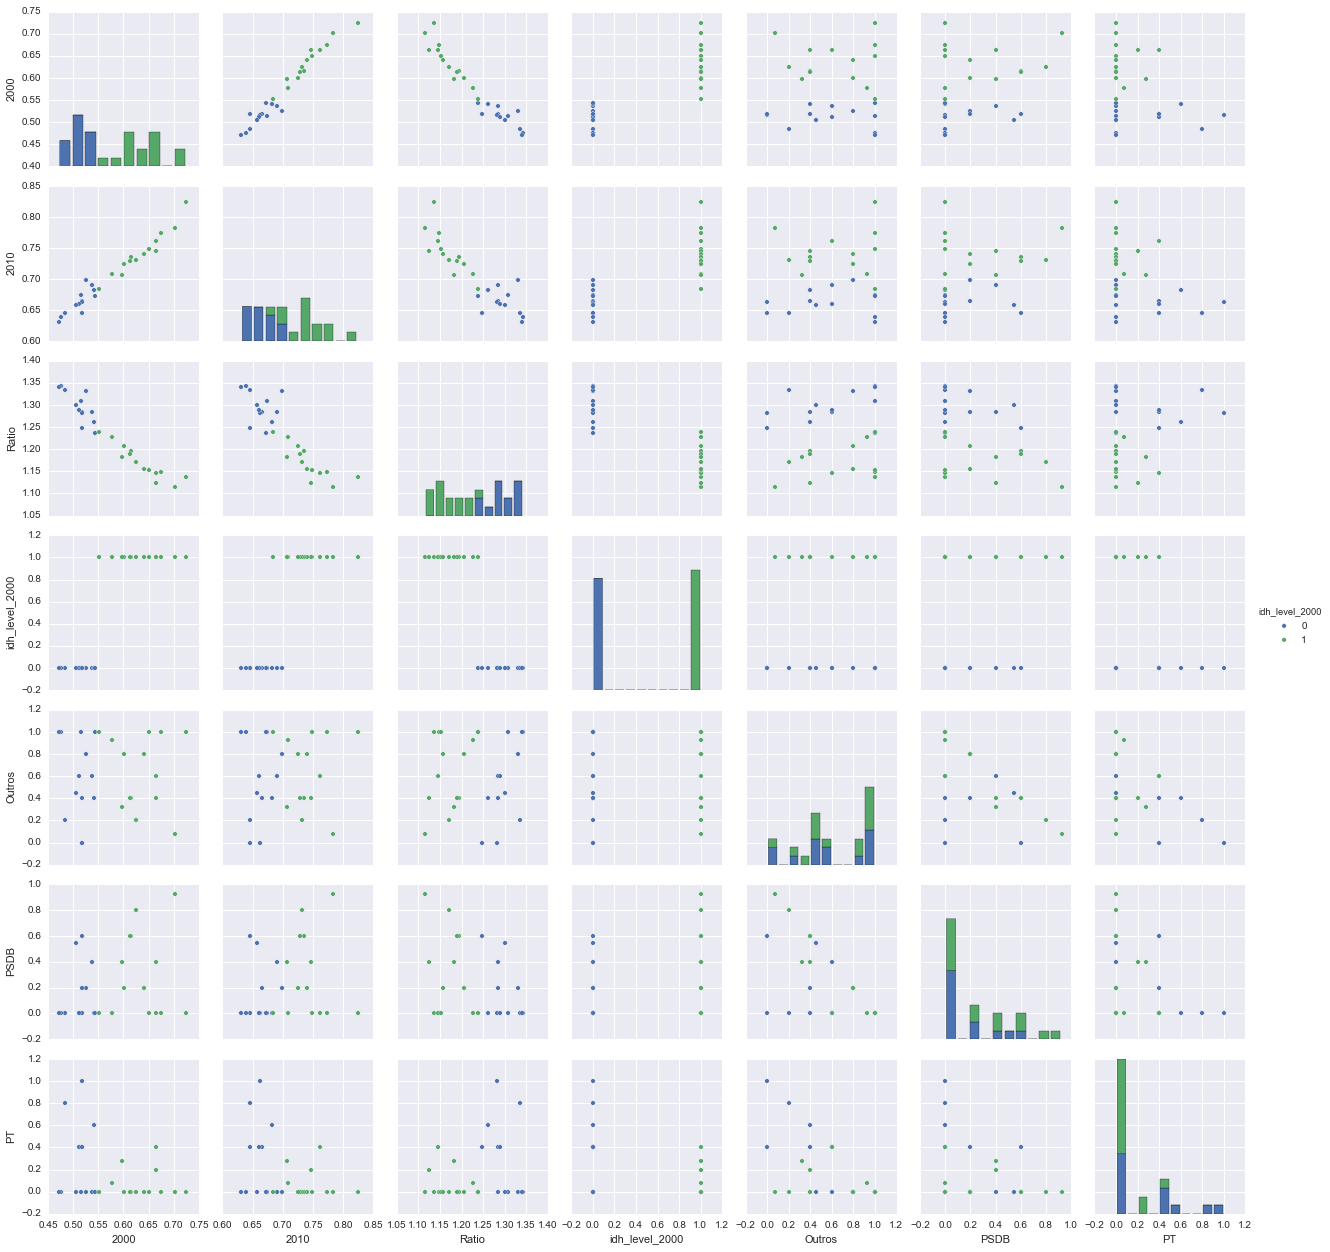

In [21]:
sns.set()
sns.pairplot(df, hue="idh_level_2000", size=2.5)

### Impacto por partido ou nível do IDH-M em 2000

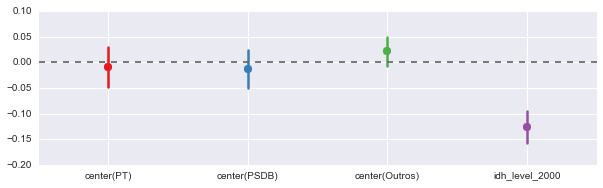

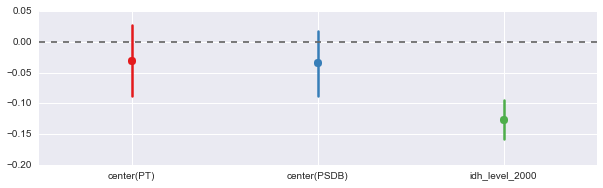

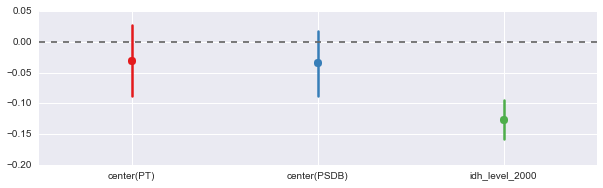

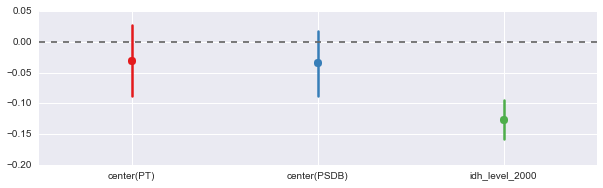

In [22]:
sns.coefplot("center(Ratio) ~ center(PT) + center(PSDB) + center(Outros) + idh_level_2000", df, palette="Set1");
sns.coefplot("center(Ratio) ~ center(PT) + center(PSDB) + idh_level_2000", df, palette="Set1");
sns.coefplot("center(Ratio) ~ center(PT) + center(PSDB) + idh_level_2000", df, palette="Set1");
sns.coefplot("center(Ratio) ~ center(PT) + center(PSDB) + idh_level_2000", df, palette="Set1");

In [23]:
from statsmodels.formula.api import ols


In [24]:
formula = "center(Ratio) ~ center(PT) + center(PSDB) + center(Outros) + idh_level_2000"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          center(Ratio)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     28.17
Date:                Sun, 19 Apr 2015   Prob (F-statistic):           7.03e-08
Time:                        10:59:20   Log-Likelihood:                 53.727
No. Observations:                  27   AIC:                            -99.45
Df Residuals:                      23   BIC:                            -94.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0655      0.010      6.253      0.000         0.044     0.087
center(PT)        -0.0089      0.019     -0.463      0.648        -0.048     0.031
center(PSDB)      -0.0130      0.018     -0.719      0.479        -0.050     0.024
center(Outros)     0.0218      0.014      1.600      0.123        -0.006     0.050
idh_level_2000    -0.1263      0.015     -8.309      0.000        -0.158    -0.095
==============================================================================
Omnibus:                        1.722   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.085
Skew:                          -0.142   Prob(JB):                        0.581
Kurtosis:                       2.060   Cond. No.                     2.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Não foi possível observar diferença significantiva entre os partidos.**

### Modelo com *pooling*

Será que existe diferença para quem está acima da média de IDH?

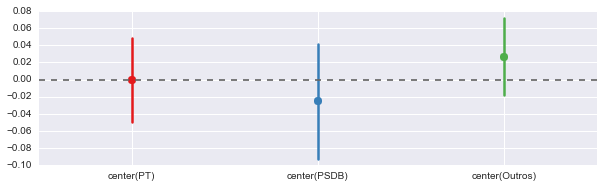

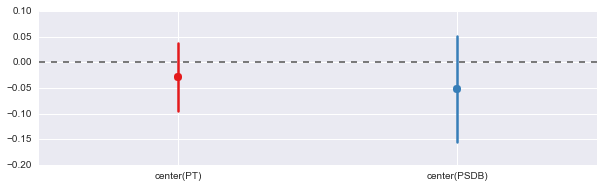

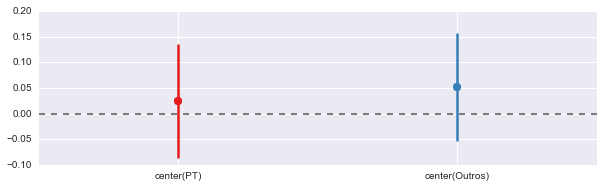

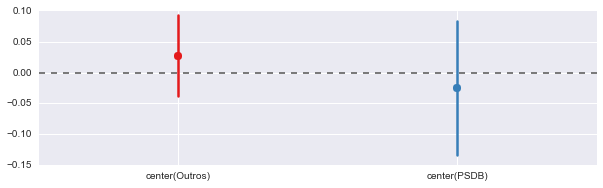

In [25]:
sns.coefplot("center(Ratio) ~ center(PT) + center(PSDB) + center(Outros)",df[df.idh_level_2000==0], palette="Set1");
sns.coefplot("center(Ratio) ~ center(PT) + center(PSDB)", df[df.idh_level_2000==0], palette="Set1");
sns.coefplot("center(Ratio) ~ center(PT) + center(Outros)", df[df.idh_level_2000==0], palette="Set1");
sns.coefplot("center(Ratio) ~ center(Outros) + center(PSDB)", df[df.idh_level_2000==0], palette="Set1");

In [26]:
formula = "center(Ratio) ~ center(PT) + center(PSDB) - 1"
model = ols(formula, df[df.idh_level_2000==0]).fit()
model.summary()

/home/regis/Documents/DataAnalysis/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          center(Ratio)   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9613
Date:                Sun, 19 Apr 2015   Prob (F-statistic):              0.412
Time:                        10:59:20   Log-Likelihood:                 26.742
No. Observations:                  13   AIC:                            -49.48
Df Residuals:                      11   BIC:                            -48.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
center(PT)      -0.0277      0.028     -0.976      0.350        -0.090     0.035
center(PSDB)    -0.0524      0.044     -1.184      0.261        -0.150     0.045
==============================================================================
Omnibus:                        2.725   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.097
Skew:                          -0.702   Prob(JB):                        0.578
Kurtosis:                       3.236   Cond. No.                         1.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Não foi possível identificar diferença nesse caso também.


Será que existe diferença então para quem está *abaixo* da média de IDH?

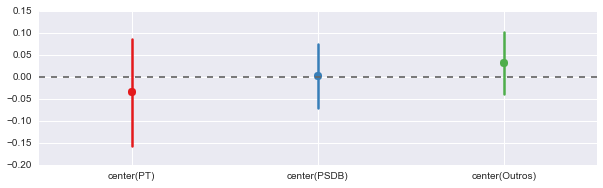

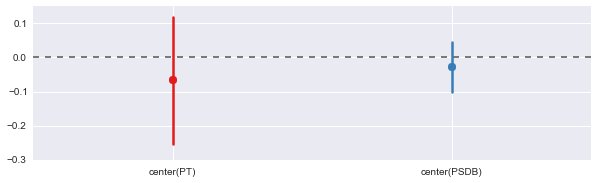

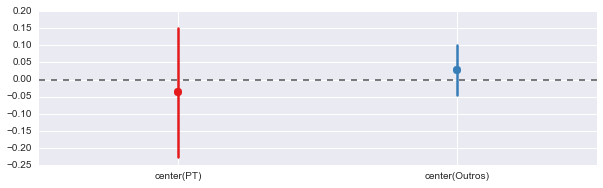

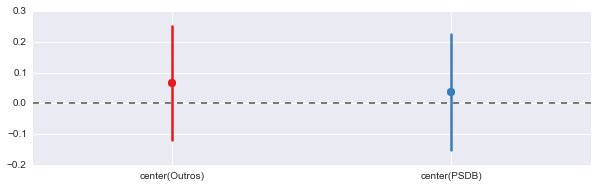

In [27]:
sns.coefplot("center(Ratio) ~ center(PT) + center(PSDB) + center(Outros)",df[df.idh_level_2000==1], palette="Set1");
sns.coefplot("center(Ratio) ~ center(PT) + center(PSDB)", df[df.idh_level_2000==1], palette="Set1");
sns.coefplot("center(Ratio) ~ center(PT) + center(Outros)", df[df.idh_level_2000==1], palette="Set1");
sns.coefplot("center(Ratio) ~ center(Outros) + center(PSDB)", df[df.idh_level_2000==1], palette="Set1");

In [28]:
formula = "scale(Ratio) ~ PT + PSDB - 1"
model = ols(formula, df[df.idh_level_2000==1]).fit()
model.summary()

/home/regis/Documents/DataAnalysis/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           scale(Ratio)   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.117
Method:                 Least Squares   F-statistic:                    0.2675
Date:                Sun, 19 Apr 2015   Prob (F-statistic):              0.770
Time:                        10:59:22   Log-Likelihood:                -19.560
No. Observations:                  14   AIC:                             43.12
Df Residuals:                      12   BIC:                             44.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
PT            -0.9633      2.044     -0.471      0.646        -5.416     3.489
PSDB          -0.2955      0.670     -0.441      0.667        -1.756     1.165
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.917
Skew:                           0.265   Prob(JB):                        0.632
Kurtosis:                       1.864   Cond. No.                         3.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Também não foi possível identificar diferença estatisticamente relevante.